In [1]:
%matplotlib notebook
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from random import randint
import pandas as pd
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import time
import setproctitle as SP
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import matplotlib.pyplot as plt

import math
import pandas
#import keras
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Input, Flatten, Dense, BatchNormalization, ReLU, Dropout, MaxPooling1D, GlobalAveragePooling1D
from numpy import savetxt
from tensorflow.keras.losses import Huber, MeanSquaredError, huber
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
import tensorflow.keras.losses
from numpy import linalg as LA
import seaborn as sns
# from keras.regularizers import l2
# from keras import backend as K
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch,Sklearn,BayesianOptimization,Hyperband
from tensorflow.keras import layers, models
from keras_tuner.engine.hyperparameters import HyperParameters
from hyperopt import hp
from tensorflow.keras.layers import Lambda
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


import matplotlib
from matplotlib import font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_dirs = ["Times_New_Roman"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
custom_font_manager = font_manager.FontManager()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# result = font_manager.fontManager.findfont('Times New Roman')
# print(result)
plt.rcParams["font.family"] = "Times New Roman"

font = {'size'   : 12}
matplotlib.rc('font', **font)

In [2]:

def Tip_RMSE(y_test_GT,y_test_pred_F,marker):
    [n_ts,m_ts]=y_test_GT.shape

    TipError=np.zeros((n_ts))
    RMSE=np.zeros((n_ts))
    EuclideanDistance=np.zeros((n_ts,20))

    for i in range (0,n_ts):
        M1=y_test_GT[i,0:3];
        M2=y_test_GT[i,3:6];
        M3=y_test_GT[i,6:9];
        M4=y_test_GT[i,9:12];
        M5=y_test_GT[i,12:15];
        M6=y_test_GT[i,15:18];
        M7=y_test_GT[i,18:21];
        M8=y_test_GT[i,21:24];
        M9=y_test_GT[i,24:27];
        M10=y_test_GT[i,27:30];
        M11=y_test_GT[i,30:33];
        M12=y_test_GT[i,33:36];
        M13=y_test_GT[i,36:39];
        M14=y_test_GT[i,39:42];
        M15=y_test_GT[i,42:45];
        M16=y_test_GT[i,45:48];
        M17=y_test_GT[i,48:51];
        M18=y_test_GT[i,51:54];
        M19=y_test_GT[i,54:57];
        M20=y_test_GT[i,57:60];
#         M21=y_test_GT[i,60:63];
    # 
        MP1=y_test_pred_F[i,0:3];
        MP2=y_test_pred_F[i,3:6];
        MP3=y_test_pred_F[i,6:9];
        MP4=y_test_pred_F[i,9:12];
        MP5=y_test_pred_F[i,12:15];
        MP6=y_test_pred_F[i,15:18];
        MP7=y_test_pred_F[i,18:21];
        MP8=y_test_pred_F[i,21:24];
        MP9=y_test_pred_F[i,24:27];
        MP10=y_test_pred_F[i,27:30];
        MP11=y_test_pred_F[i,30:33];
        MP12=y_test_pred_F[i,33:36];
        MP13=y_test_pred_F[i,36:39];
        MP14=y_test_pred_F[i,39:42];
        MP15=y_test_pred_F[i,42:45];
        MP16=y_test_pred_F[i,45:48];
        MP17=y_test_pred_F[i,48:51];
        MP18=y_test_pred_F[i,51:54];
        MP19=y_test_pred_F[i,54:57];
        MP20=y_test_pred_F[i,57:60];
#         MP21=y_test_pred_F[i,60:63];

    #     
        EuclideanDistance[i,:]=[LA.norm(MP1-M1),LA.norm(MP2-M2),LA.norm(MP3-M3),LA.norm(MP4-M4),LA.norm(MP5-M5),LA.norm(MP6-M6)
                                  ,LA.norm(MP7-M7),LA.norm(MP8-M8),LA.norm(MP9-M9),LA.norm(MP10-M10),LA.norm(MP11-M11)
                                  ,LA.norm(MP12-M12),LA.norm(MP13-M13),LA.norm(MP14-M14),LA.norm(MP15-M15),LA.norm(MP16-M16)
                                  ,LA.norm(MP17-M17),LA.norm(MP18-M18),LA.norm(MP19-M19),LA.norm(MP20-M20)];
    
        TipError[i]=EuclideanDistance[i,marker]
        RMSE[i]=tf.sqrt(tf.math.reduce_mean(tf.square(EuclideanDistance[i,0:marker+1])))
    inq_TE=np.quantile(TipError,[0.25, 0.75])
    upper_bound_TE = inq_TE[1]+(1.5*(inq_TE[1]-inq_TE[0]))
    lower_bound_TE = inq_TE[0]-(1.5*(inq_TE[1]-inq_TE[0]))
    Outliers_TE=TipError[(TipError <= lower_bound_TE) | (TipError >= upper_bound_TE)]
    
    inq_RMSE=np.quantile(RMSE,[0.25, 0.75])
    upper_bound_RMSE = inq_RMSE[1]+(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    lower_bound_RMSE = inq_RMSE[0]-(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    Outliers_RMSE=RMSE[(RMSE <= lower_bound_RMSE) | (RMSE >= upper_bound_RMSE)]
    

    print([np.mean(TipError),np.std(TipError)],'Tip Error_Mean_STD')
    print([np.median(TipError),inq_TE[1]-inq_TE[0],len(Outliers_TE)],'Tip Error_Median_IQR_Outliers')
    print([np.mean(RMSE),np.std(RMSE)],'RMSE_Mean_STD')
    print([np.median(RMSE),inq_RMSE[1]-inq_RMSE[0],len(Outliers_RMSE)],'RMSE_Median_IQR_Outliers')
    
#     green_diamond = dict(marker='D',markeredgecolor='0.7', markersize=3)#markerfacecolor=None, , alpha=0.6
#     medianprops = dict(linewidth=1.5)
    
# #     plt.figure(figsize=(3,4))
# #     plt.boxplot([TipError,RMSE],labels=['Tip Error','RMSE'],flierprops=green_diamond,medianprops=medianprops)
# #     plt.ylabel('Error [mm]')
# #     plt.grid(b=True, which='both', axis='both', color='0.95')
# #     plt.ylim(top=100,bottom=-1)
# #     plt.tight_layout()
# # #     plt.savefig('TipRMSE.svg',format='svg')

#     plt.figure(figsize=(8,4))
#     plt.boxplot(EuclideanDistance[:,:],flierprops=green_diamond,medianprops=medianprops)
# #     plt.ylim(top=100,bottom=-1)
#     plt.ylabel('Error [mm]')
#     plt.xlabel('Marker')
#     plt.grid(b=True, which='both', axis='both', color='0.95')
#     plt.tight_layout()
# #     plt.savefig('EUC.svg',format='svg')
    return np.mean(TipError),np.std(TipError) 
    
import mpl_toolkits.mplot3d

# Functions from @Mateen Ulhaq and @karlo
def set_axes_equal(ax: plt.Axes):
    """Set 3D plot axes to equal scale.

    Make axes of 3D plot have equal scale so that spheres appear as
    spheres and cubes as cubes.  Required since `ax.axis('equal')`
    and `ax.set_aspect('equal')` don't work on 3D.
    """
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)

def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])

def plotting3D(a,b,path):
    with open('label.txt') as f:
        contents = f.read()
    label=np.fromstring(contents, dtype=float, sep=' ')
    label=np.reshape(label,(-1,60))
    # print(label.shape)
    f.close()

    with open('output.txt') as f:
        contents = f.read()
    output=np.fromstring(contents, dtype=float, sep=' ')
    output=np.reshape(output,(-1,60))
    # print(output.shape)
    f.close()

    pred_Relative=output
    pred_Absolute = np.zeros((len(pred_Relative),60)) 
    for i in range(0,len(pred_Relative)):
        pred_Absolute[i,0:3]=pred_Relative[i,0:3]
        for j in range(1,20):
                pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
                pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
                pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]

    Col=['#1b9e77','#d95f02','#7570b3']
#     j=randint(0,label.shape[0])

    for i in range (a,b):
        xyz=label[i,:].reshape((20,3))
        xyzP=pred_Absolute[i,:].reshape((20,3))
        ax.clear()
        ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], color=Col[0], linewidth=1 ,marker='o',markersize=3,linestyle='None',alpha=0.7)
        ax.plot(xyzP[:,0], xyzP[:,1], xyzP[:,2], color=Col[1], linewidth=1.5)#,marker='o',markersize=5)

        null = np.zeros(len(xyz[:,0]))

        offsetX=-300
        offsetY=-350
        offsetZ=-300
        alpha=0.2
        col=Col[0]
        ax.plot(xyz[:,0], xyz[:,1],null+offsetZ,color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)
        ax.plot(xyz[:,0],null, xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)#-offsetY
        ax.plot(null+offsetX,xyz[:,1], xyz[:,2],color=col,linestyle='None',marker='o',alpha=alpha,markersize=3)

        colP=Col[1]
        ax.plot(xyzP[:,0], xyzP[:,1],null+offsetZ,color=colP,alpha=alpha)
        # ax.plot(xyzP[:,0],null+offsetY, xyzP[:,2],color=colP)
        ax.plot(null+offsetX,xyzP[:,1], xyzP[:,2],color=colP,alpha=alpha)

        ax.axes.set_xlim3d(left=offsetX, right=300) 
        ax.axes.set_ylim3d(bottom=offsetY, top=0) 
        ax.axes.set_zlim3d(bottom=offsetZ, top=300)

        ax.locator_params(axis='x', nbins=6)
        ax.locator_params(axis='y', nbins=6)
        ax.locator_params(axis='z', nbins=6)

        ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
        ax.set_ylabel('Y [mm]')
        ax.set_zlabel('Z [mm]')
    #     ax.view_init(elev=20., azim=60)
    #     ax.legend(['Real Shape','Sensing plane','Predicted Shape'], loc='upper left')

    #     plt.pause(0.001)
        fig.canvas.draw()
    #     # save figure with different names depend on the view
    #     filename='3d_vis_FBGlocations'+str(i)+'.png'
    #     plt.savefig(filename, dpi=300)

def EvaluatingGrad(path,marker):
    with open('label.txt') as f:
        contents = f.read()
    label=np.fromstring(contents, dtype=float, sep=' ')
    label=np.reshape(label,(-1,60))
    # print(label.shape)
    f.close()

    with open('output.txt') as f:
        contents = f.read()
    output=np.fromstring(contents, dtype=float, sep=' ')
    output=np.reshape(output,(-1,60))
    # print(output.shape)
    f.close()

    pred_Relative=output
    pred_Absolute = np.zeros((len(pred_Relative),60)) 
    for i in range(0,len(pred_Relative)):
        pred_Absolute[i,0:3]=pred_Relative[i,0:3]
        for j in range(1,20):
                pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
                pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
                pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]

    Tip_RMSE(label,pred_Absolute,marker)
    return label,pred_Absolute
    
def EvaluatingGrad_k(path,k1,k2,marker):
    with open('label.txt') as f:
        contents = f.read()
    label=np.fromstring(contents, dtype=float, sep=' ')
    label=np.reshape(label,(-1,60))
    # print(label.shape)
    f.close()

    with open('output.txt') as f:
        contents = f.read()
    output=np.fromstring(contents, dtype=float, sep=' ')
    output=np.reshape(output,(-1,60))
    # print(output.shape)
    f.close()

    pred_Relative=output
    pred_Absolute = np.zeros((len(pred_Relative),60)) 
    for i in range(0,len(pred_Relative)):
        pred_Absolute[i,0:3]=pred_Relative[i,0:3]
        for j in range(1,20):
                pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
                pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
                pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]

    Tip_RMSE(label[k1:k2,:],pred_Absolute[k1:k2,:],marker)
    return label[k1:k2,:],pred_Absolute[k1:k2,:]

In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))



<IPython.core.display.Javascript object>


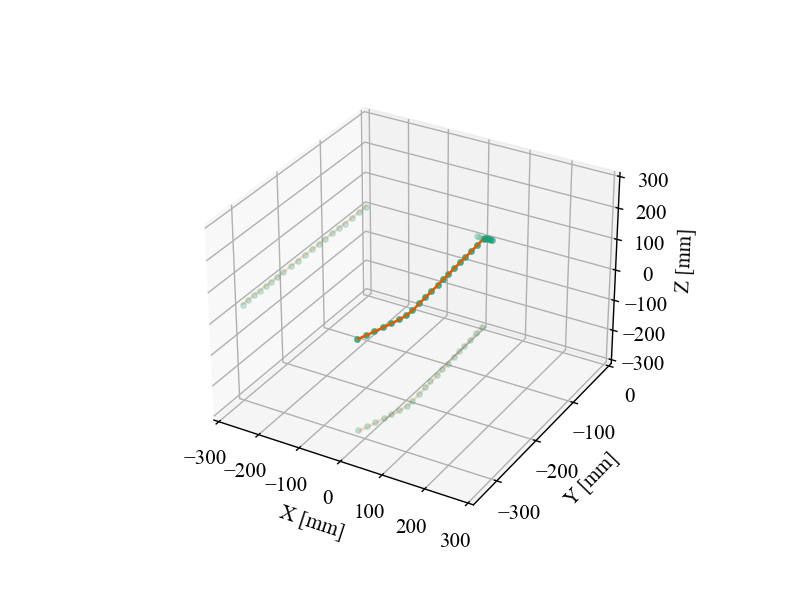

In [5]:
fig = plt.figure()

ax= fig.gca(projection='3d')
plt.ion()
fig.show()

path=os.chdir("evaluation/PytorchTraining/1606_3min_first")
#1[530,2070]#2[770,1910]#3[1110,1710]#4[1320,1560]
c=1320
step=20
a=c-step
b=c+step
plotting3D(a,b,path)

(320, 60)
(320, 60)
[7.861566608130033, 6.1391064023260284] Tip Error_Mean_STD
[6.044421494258874, 8.946878956302884, 2] Tip Error_Median_IQR_Outliers
[6.587579938020875, 5.0809599347177645] RMSE_Mean_STD
[5.13178970939259, 6.65202749591922, 10] RMSE_Median_IQR_Outliers


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


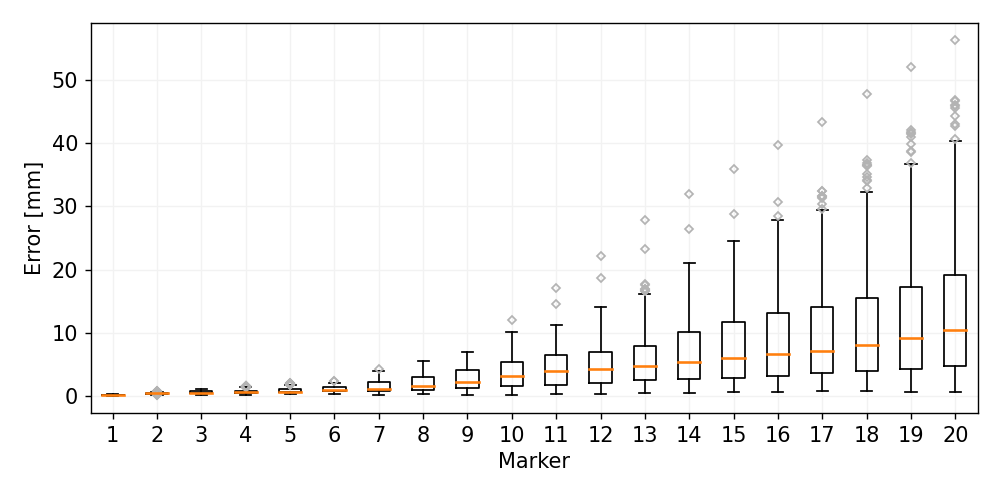

In [173]:

path=os.chdir("/evaluation/PytorchTraining/1606_3min_first") 
# label,pred_Absolute=EvaluatingGrad(path)
SelectedSamples=np.array([530,2070,770,1910,1110,1710,1320,1560])

for i in range(0,len(SelectedSamples)):
    if i == 0:
        label_GT=label[SelectedSamples[i]-20:SelectedSamples[i]+20,:]
        Prediction=pred_Absolute[SelectedSamples[i]-20:SelectedSamples[i]+20,:]        
    else:
        label_GT=np.concatenate((label_GT,label[SelectedSamples[i]-20:SelectedSamples[i]+20,:]), axis=0)
        Prediction=np.concatenate((Prediction,pred_Absolute[SelectedSamples[i]-20:SelectedSamples[i]+20,:]), axis=0)
print(np.array(label_GT).shape)    
print(np.array(Prediction).shape)    
marker=15
Tip_RMSE(label_GT,Prediction,marker-1)

<IPython.core.display.Javascript object>


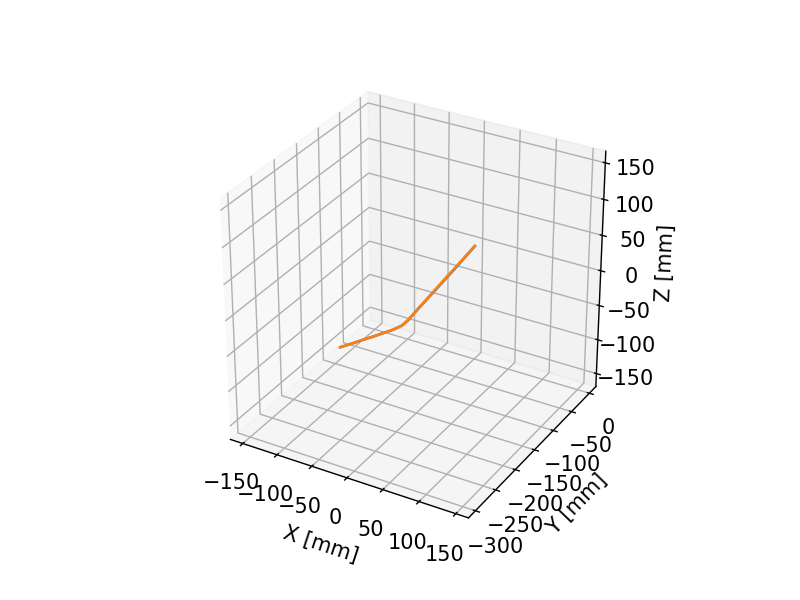

In [177]:
j=300
xyz=Prediction[j].reshape((20,3))

fig = plt.figure()
ax= fig.gca(projection='3d')
plt.ion()
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])

xyz=label_GT[j].reshape((20,3))

ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])

ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
fig.show()

[2.8667296000776217, 2.8206150049715304] Tip Error_Mean_STD
[2.0996273286175837, 2.579900257212727, 340] Tip Error_Median_IQR_Outliers
[1.8865281002196468, 1.7752231714046036] RMSE_Mean_STD
[1.4637204829552748, 1.5869162611175447, 328] RMSE_Median_IQR_Outliers


<IPython.core.display.Javascript object>


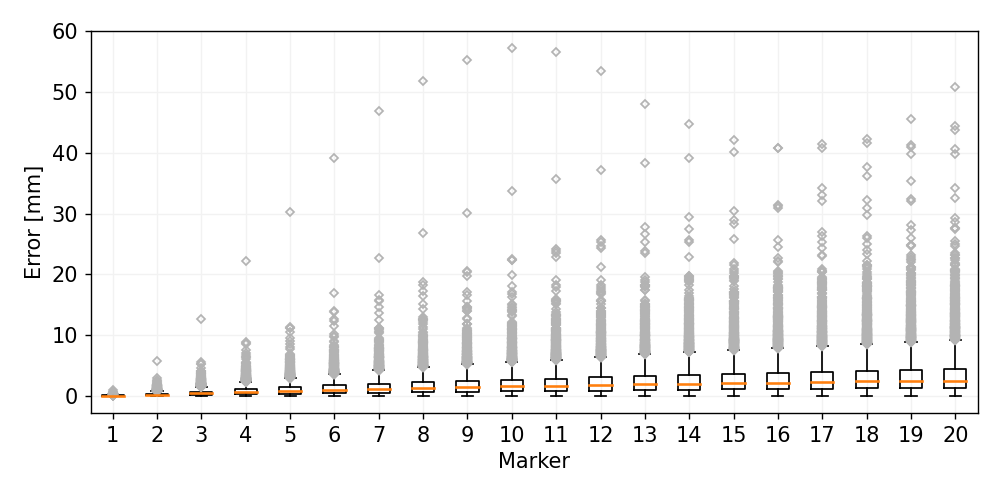

[16.75843297524019, 9.63669983962102] Tip Error_Mean_STD
[15.012744141333556, 9.944396256863076, 138] Tip Error_Median_IQR_Outliers
[9.704102174528293, 5.1805735196866785] RMSE_Mean_STD
[8.658259789770709, 5.64819495894313, 143] RMSE_Median_IQR_Outliers


<IPython.core.display.Javascript object>


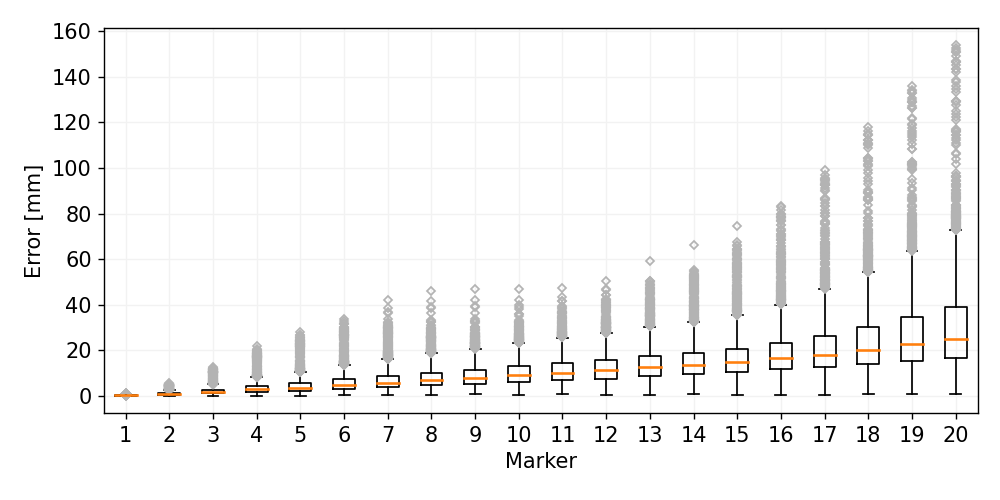

[22.961987314359053, 13.10826727562634] Tip Error_Mean_STD
[20.660944948068348, 14.228176060810942, 125] Tip Error_Median_IQR_Outliers
[13.149692921684204, 7.35111599173797] RMSE_Mean_STD
[11.582639991792249, 7.90164761152378, 127] RMSE_Median_IQR_Outliers


<IPython.core.display.Javascript object>


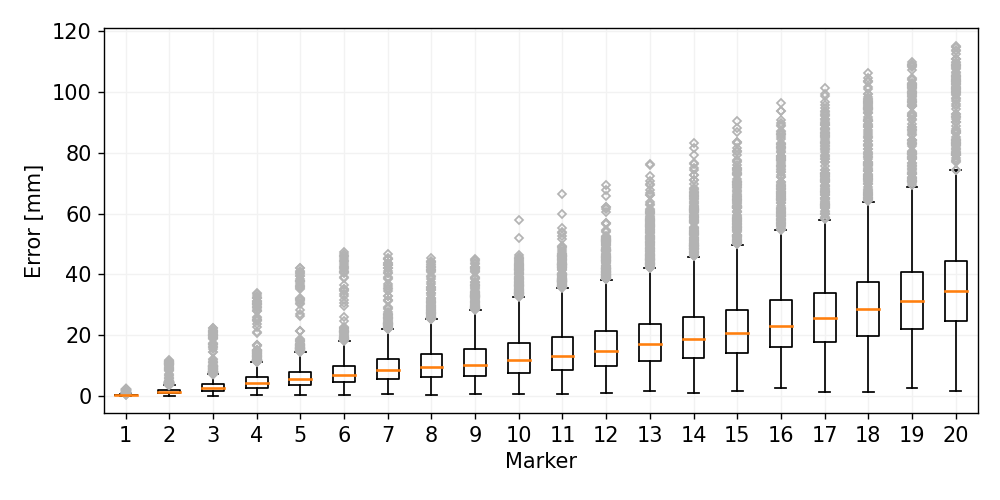

[19.54287365862699, 11.739995453283557] Tip Error_Mean_STD
[17.123058606612105, 12.565418045848256, 256] Tip Error_Median_IQR_Outliers
[11.250641872614466, 6.479518879333999] RMSE_Mean_STD
[9.858002702413314, 6.974446761258478, 279] RMSE_Median_IQR_Outliers


<IPython.core.display.Javascript object>


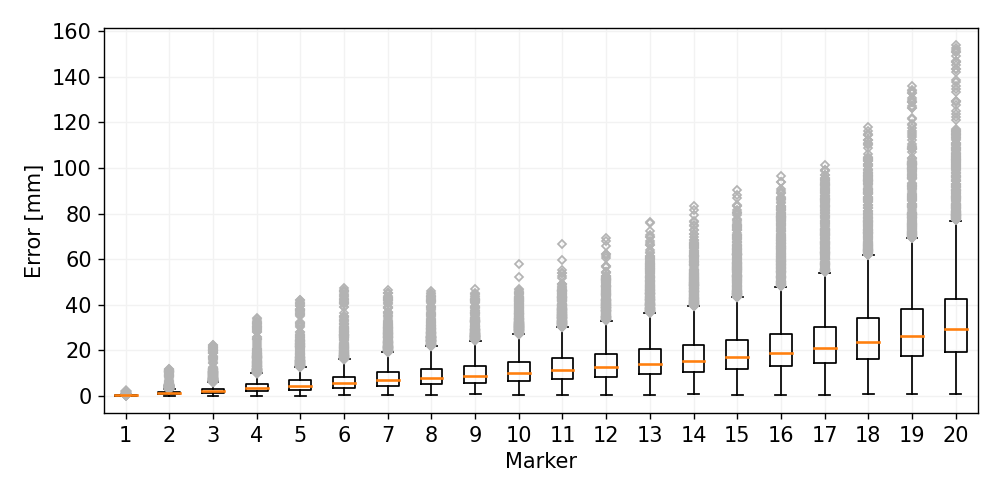

In [175]:
path=os.chdir("/evaluation/PytorchTraining/RandomTest_1606")
EvaluatingGrad(path,marker-1)
path=os.chdir("/evaluation/PytorchTraining/1606_3min_first") 
label_1,pred_Absolute_1=EvaluatingGrad_k(path,2200,5400,marker-1)
path=os.chdir("/evaluation/PytorchTraining/1606_3min_second")
label_2,pred_Absolute_2=EvaluatingGrad_k(path,2700,5306,marker-1)
label_t=np.concatenate((label_1,label_2), axis=0)
# print(label_t.shape)
pred_Absolute_t=np.concatenate((pred_Absolute_1,pred_Absolute_2), axis=0)
# print(pred_Absolute_t.shape)
Tip_RMSE(label_t,pred_Absolute_t,marker-1)